# Insurance Cross Sell Prediction

About the Dataset:-
1.Insurance companies that sell,health and property and casually insurance are using (ML)to drive
the improvements in customer service,fraud detection and operational efficiency.
2.We can build a model to predict whether the customers from the past years will also be interested
in the vehicle insurance provided by the company.(So that accordingly the company can plan its strategy)

     We have the info about:-(Features)
1.Demographics(gender,age,region code type)
2.Vehicles(vehicle age,Damage)
3.Policy(Premium,sourcing channel)


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import matplotlib.pyplot as plt

In [2]:
#fetch data from csv: convert csv to dataframe
#d1=pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\train.csv")
#d1 
#d1.head(2)
d1=pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\health_insurance.csv")
d1 
d1.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [3]:
d1.shape  #Shape of the set

(381109, 12)

In [4]:
d1.describe()    #Response is the target column

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
d1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# Missing Value Treatment

In [7]:
d1.isnull().sum()  

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
#data4.info()
d1=d1.drop(['id'],axis=1)
d1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# Dtype Conversion

In [9]:
d1.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
d1.Gender=le.fit_transform(d1.Gender)
d1.Vehicle_Age=le.fit_transform(d1.Vehicle_Age)
d1.Vehicle_Damage=le.fit_transform(d1.Vehicle_Damage)


In [11]:
d1.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [12]:
d1.dtypes

Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

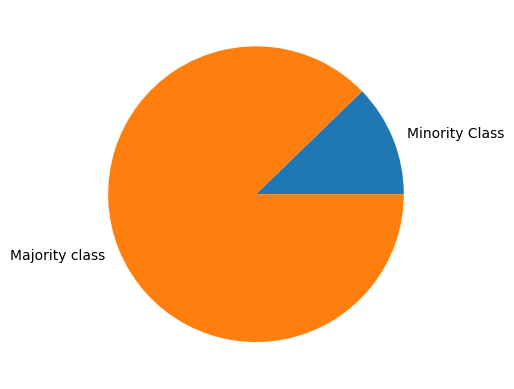

In [13]:
c=[d1[d1['Response']==1].shape[0],d1[d1['Response']==0].shape[0]]
labels_1=['Minority Class', 'Majority class']
plt.pie(c,labels=labels_1)
plt.show

# Base Models:-

In [14]:
d1.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0


In [15]:
d1.shape

(381109, 11)

In [16]:
d1.Vehicle_Damage.value_counts()

1    192413
0    188696
Name: Vehicle_Damage, dtype: int64

In [17]:
x=d1.iloc[:,0:-1]
y=d1.iloc[:,-1]

In [18]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39


In [19]:
y.head(2)

0    1
1    0
Name: Response, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((304887, 10), (76222, 10), (304887,), (76222,))

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
p1=lg.predict(x_test)
#p1
from sklearn.metrics import confusion_matrix
cf1=confusion_matrix(y_test,p1)
cf1 

array([[66881,    90],
       [ 9223,    28]], dtype=int64)

In [22]:
ac1=cf1.diagonal().sum()/cf1.sum()*100
ac1

87.78174280391488

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66971
           1       0.24      0.00      0.01      9251

    accuracy                           0.88     76222
   macro avg       0.56      0.50      0.47     76222
weighted avg       0.80      0.88      0.82     76222



In [24]:
lg_f1=f1_score(y_test,p1)
lg_pr1=precision_score(y_test,p1)
lg_r1=recall_score(y_test,p1)
print(lg_f1,lg_pr1,lg_r1)


0.005977158714910877 0.23728813559322035 0.0030266998162360825


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_p=dt.predict(x_test)
#dt_p
dt_c=confusion_matrix(y_test,dt_p)
dt_c

array([[60059,  6912],
       [ 6373,  2878]], dtype=int64)

In [26]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

82.57064889402011

In [27]:

from sklearn.metrics import classification_report
print(classification_report(y_test,dt_p))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66971
           1       0.29      0.31      0.30      9251

    accuracy                           0.83     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.83      0.83     76222



In [28]:
dt_f1=f1_score(y_test,dt_p)
dt_pr1=precision_score(y_test,dt_p)
dt_r1=recall_score(y_test,dt_p)
print(dt_f1,dt_pr1,dt_r1)

0.3022950475290163 0.293973442288049 0.3111015025402659


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_p=rf.predict(x_test)
rf_c=confusion_matrix(rf_p,y_test)#Wrong
rf_c

array([[65016,  8136],
       [ 1955,  1115]], dtype=int64)

In [30]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

86.76104011965049

In [31]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     73152
           1       0.12      0.36      0.18      3070

    accuracy                           0.87     76222
   macro avg       0.55      0.63      0.55     76222
weighted avg       0.94      0.87      0.90     76222



In [32]:
rf_f1=f1_score(y_test,rf_p)
rf_pr1=precision_score(y_test,rf_p)
rf_r1=recall_score(y_test,rf_p)
print(rf_f1,rf_pr1,rf_r1)

0.18099180261342424 0.36319218241042345 0.12052751053940114


# XGBoost

In [33]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_p=xgb.predict(x_test)
from sklearn.metrics import confusion_matrix
xgb_cf=confusion_matrix(y_test,xgb_p)
xgb_cf

array([[66691,   280],
       [ 9021,   230]], dtype=int64)

In [34]:
xgb_ac=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_ac

87.79748629004749

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xgb_p))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66971
           1       0.45      0.02      0.05      9251

    accuracy                           0.88     76222
   macro avg       0.67      0.51      0.49     76222
weighted avg       0.83      0.88      0.83     76222



In [36]:
xgb_f1=f1_score(y_test,xgb_p)
xgb_pr1=precision_score(y_test,xgb_p)
xgb_r1=recall_score(y_test,xgb_p)
print(xgb_f1,xgb_pr1,xgb_r1)

0.0471263190246901 0.45098039215686275 0.02486217706193925


# NB(Naive Baye's)

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [38]:
nb.fit(x_train,y_train)
nb_p1=nb.predict(x_test)
nb_c1=confusion_matrix(y_test,nb_p1)
nb_c1

array([[46685, 20286],
       [ 4648,  4603]], dtype=int64)

In [39]:
nb_ac1=nb_c1.diagonal().sum()/nb_c1.sum()*100
nb_ac1

67.28765973078639

In [40]:
print(classification_report(y_test,nb_p1))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79     66971
           1       0.18      0.50      0.27      9251

    accuracy                           0.67     76222
   macro avg       0.55      0.60      0.53     76222
weighted avg       0.82      0.67      0.73     76222



In [41]:
nb_f1=f1_score(y_test,nb_p1)
nb_pr1=precision_score(y_test,nb_p1)
nb_r1=recall_score(y_test,nb_p1)
print(nb_f1,nb_pr1,nb_r1)

0.2696543643819566 0.184941138655631 0.4975678305048103


In [42]:
A1=["LR","DT","RF","XGB","NB"]
A2=[ac1,dt_ac,rf_ac,xgb_ac,nb_ac1]
A3=[lg_pr1,dt_pr1,rf_pr1,xgb_pr1,nb_pr1]
A4=[lg_r1,dt_r1,rf_r1,xgb_r1,nb_r1]
A5=[lg_f1,dt_f1,rf_f1,xgb_f1,nb_f1]

In [43]:
final_df=pd.DataFrame({"Model":A1,"Accuracy":A2,"Precision":A3,"Recall":A4,"f1_score":A5})
final_df

,Model,Accuracy,Precision,Recall,f1_score
0,LR,87.781743,0.237288,0.003027,0.005977
1,DT,82.570649,0.293973,0.311102,0.302295
2,RF,86.761040,0.363192,0.120528,0.180992
3,XGB,87.797486,0.450980,0.024862,0.047126
4,NB,67.287660,0.184941,0.497568,0.269654


# Random Under Sampling(Class Imbalance)

In [44]:
#d1.shape

In [45]:
#d1.Response.value_counts()

In [46]:
#c_0,c_1=d1["Response"].value_counts()
#c_0,c_1

In [47]:
#train_0=d1[d1["Response"]==0]# all zeros record
#train_1=d1[d1["Response"]==1]#all ones record
#train_0.shape,train_1.shape

In [48]:
#class_0under=train_0.sample(c_1)

In [49]:
#class_0under.shape,train_1.shape

In [50]:
#class0_1=pd.concat([class_0under,train_1],axis=0)#axis=0 row wise
#class0_1.head
#class0_1.shape

In [51]:
#class0_1.Response.value_counts()

In [52]:
#x=class0_1.iloc[:,1:-1]
#y=class0_1.iloc[:,-1]

In [53]:
#from sklearn.model_selection import train_test_split
#x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=100)
#x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

# IMBlearn Under_Sampling Technique

In [54]:
#import imblearn
#from imblearn.under_sampling import RandomUnderSampler

In [55]:
#d1.Response.value_counts()

In [56]:
#d1_x=d1.iloc[:,1:-1]
#d1_y=d1.iloc[:,-1]

In [57]:
#r=RandomUnderSampler(sampling_strategy="all")

In [58]:
#x1,y1,=r.fit_resample(d1_x,d1_y)
#x1.shape,y1.shape


In [59]:
#x_tr1,x_te1,y_tr1,y_te1=train_test_split(x1,y1,test_size=0.2,random_state=100)
#x_tr1.shape,x_te1.shape,y_tr1.shape,y_te1.shape

# Near Miss Under_Sampling Technique

In [60]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [61]:
x_3=d1.iloc[:,0:-1]
y_3=d1.iloc[:,-1]

In [ ]:
x1,y1=nm.fit_resample(x_3,y_3)

In [ ]:
x1.shape,y1.shape

In [ ]:
final_df7=pd.concat([x1,y1],axis=1)
final_df7.head(2)

In [ ]:
y1.value_counts()

In [ ]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_3,y_3,test_size=0.2,random_state=101)
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

# Random Over_Sampling

In [ ]:
#c_0,c_1#icreases the record which are less in number

In [ ]:
#class_1over=train_1.sample(c_0,replace=True)

In [ ]:
#class_1over.head()
#class_1over.shape,train_0.shape

In [ ]:
#class1_0=pd.concat([class_1over,train_0],axis=0)
#class1_0.shape

In [ ]:
#class1_0.Response.value_counts()

In [ ]:
#x1=class1_0.iloc[:,1:-1]
#y1=class1_0.iloc[:,-1]

In [ ]:
#x2_train,x2_test,y2_train,y2_test=train_test_split(x1,y1,test_size=0.2,random_state=100)
#x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape

# IMBLearn Over_Sampling Technique

In [ ]:
#x9=d1.iloc[:,1:-1]

In [ ]:
#y9=d1.iloc[:,-1]

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#a1=RandomOverSampler(random_state=42)

In [ ]:
#x5,y5=a1.fit_resample(x9,y9)

In [ ]:
#x5.shape,y5.shape

In [ ]:
#x5_tr,x5_te,y5_tr,y5_te=train_test_split(x5,y5,test_size=0.2,random_state=100)
#x5_tr.shape,x5_te.shape,y5_tr.shape,y5_te.shape

# SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
#x11=d1.iloc[:,1:-1]
#y11=d1.iloc[:,-1]

In [ ]:
#y11.value_counts() #imbalance values

In [ ]:
#from imblearn.over_sampling import SMOTE
#smote=SMOTE()
#xsmote,ysmote=smote.fit_resample(x11,y11)
#xsmote.shape,ysmote.shape

In [ ]:
#ysmote.value_counts()

In [ ]:
#xsmote_tr,xsmote_te,ysmote_tr,ysmote_te=train_test_split(xsmote,ysmote,test_size=0.2,random_state=100)
#xsmote_tr.shape,xsmote_te.shape,ysmote_tr.shape,ysmote_te.shape

In [ ]:
#d1_n=d1.corr()
#d1_n

In [ ]:
#final_df7.skew()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#plt.figure(figsize=(14,7))
#heatmap=sns.heatmap(d1,linewidth=2,annot=True,cmap=plt.cm.viridis)#YlGnBu
#plt.title("Heatmap using Seaborn")
#plt.show()

# Outlier Treatment

In [ ]:
fig=plt.figure(figsize=(20,11))
sns.boxplot(data=final_df7)

In [ ]:
final_df7.Annual_Premium.describe()

In [ ]:
sns.boxplot(data=final_df7,y="Annual_Premium")

In [ ]:
sns.distplot(final_df7.Annual_Premium,color="Red") 

In [ ]:
final_df7.Annual_Premium.hist(color="Orange")

In [ ]:
IQR1=final_df7.Annual_Premium.quantile(0.75)-final_df7.Annual_Premium.quantile(0.25)
IQR1

In [ ]:
ub1=final_df7.Annual_Premium.quantile(0.75)+3*IQR1
lb1=final_df7.Annual_Premium.quantile(0.25)-3*IQR1
print(ub1,lb1)
ub1

In [ ]:
final_df7.loc[final_df7["Annual_Premium"]>124126 ,"Annual_Premium"]=124126   #upper:datapoint above 84385 are imputed into 84385

In [ ]:
sns.distplot(final_df7.Annual_Premium,color="green") 

In [ ]:
final_df7.Annual_Premium.hist(color="Green")

# Skewness treatment

In [ ]:
final_df7.skew()

In [ ]:
final_df7["Annual_Premium"]=np.sqrt(final_df7["Annual_Premium"])

In [ ]:
final_df7.skew()

In [ ]:
#sns.distplot(final_df7.Annual_Premium,color="green") 

# LR

In [ ]:
x3=final_df7.iloc[:,0:-1]
y3=final_df7.iloc[:,-1]

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x3,y3,test_size=0.2,random_state=100)
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()


In [ ]:
lg1.fit(x_train1,y_train1)
lg_p2=lg1.predict(x_test1)
cf_2=confusion_matrix(y_test1,lg_p2)
cf_2

In [ ]:
lg_ac2=cf_2.diagonal().sum()/cf_2.sum()*100
lg_ac2

In [ ]:
re_21=recall_score(y_test1,lg_p2)
pr_21=precision_score(y_test1,lg_p2)
f21=f1_score(y_test1,lg_p2,average="weighted")
print(classification_report(y_test1,lg_p2)) 

# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
dt1.fit(x_train1,y_train1)
dt_p2=dt1.predict(x_test1)
#dt_p2
dt_c2=confusion_matrix(y_test1,dt_p2)
dt_c2

In [ ]:
dt_ac2=dt_c2.diagonal().sum()/dt_c2.sum()*100
dt_ac2

In [ ]:
re_22=recall_score(y_test1,dt_p2)
pr_22=precision_score(y_test1,dt_p2)
f22=f1_score(y_test1,dt_p2,average="weighted")
print(classification_report(y_test1,dt_p2))

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier()
rf2.fit(x_train1,y_train1)
rf_p2=rf2.predict(x_test1)
rf_c2=confusion_matrix(y_test1,rf_p2)
rf_c2

In [ ]:
rf_ac2=rf_c2.diagonal().sum()/rf_c2.sum()*100
rf_ac2

In [ ]:
re_23=recall_score(y_test1,rf_p2)
pr_23=precision_score(y_test1,rf_p2)
f23=f1_score(rf_p2,y_test1,average="weighted")
print(classification_report(y_test1,rf_p2))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(x_train1,y_train1)
knn_p2=knn1.predict(x_test1)
knn_c2=confusion_matrix(y_test1,knn_p2)
knn_c2

In [ ]:
knn_ac2=knn_c2.diagonal().sum()/knn_c2.sum()*100
knn_ac2

In [ ]:
re_24=recall_score(y_test1,knn_p2)
pr_24=precision_score(y_test1,knn_p2)
f24=f1_score(knn_p2,y_test1,average="weighted")
print(classification_report(y_test1,knn_p2))

# XGBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb1=XGBClassifier()
xgb1.fit(x_train1,y_train1)
xgb_p2=xgb1.predict(x_test1)
#xgb_p2
xgb_c2=confusion_matrix(xgb_p2,y_test1)
xgb_c2

In [ ]:
xgb_ac2=xgb_c2.diagonal().sum()/xgb_c2.sum()*100
xgb_ac2

In [ ]:
re_25=recall_score(y_test1,xgb_p2)
pr_25=precision_score(y_test1,xgb_p2)
f25=f1_score(xgb_p2,y_test1,average="weighted")
print(classification_report(xgb_p2,y_test1))

# NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb1=MultinomialNB()
nb1.fit(x_train1,y_train1)
nb_p2=nb1.predict(x_test1)
cf_n2=confusion_matrix(y_test1,nb_p2)
cf_n2

In [ ]:
nb_ac2=cf_n2.diagonal().sum()/cf_n2.sum()*100
nb_ac2

In [ ]:
re_27=recall_score(y_test1,nb_p2)
pr_27=precision_score(y_test1,nb_p2)
f27=f1_score(y_test1,nb_p2,average="weighted")
print(classification_report(y_test1,nb_p2))

In [ ]:
Model2=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB(XGBoost)","Naive Bayes"]
Accuracy2=[lg_ac2,dt_ac2,rf_ac2,knn_ac2,xgb_ac2,nb_ac2]
f1_score2=[f21,f22,f23,f24,f25,f27]
recall2=[re_21,re_22,re_23,re_24,re_25,re_27]
precision2=[pr_21,pr_22,pr_23,pr_24,pr_25,pr_27]

In [ ]:
Model1=pd.DataFrame({"Model":Model2,"Accuracy":Accuracy2,"f1-Score":f1_score2,"recall":recall2,"precision":precision2})  
Model1

# Conclusion after applying the sampling technique:-

In [ ]:
#Undersampling:-
#Imblearn:-(XGB)Is having High accuracy with high TN
#NearMiss:-(XGB)having high accuracy with low TN  /*XGB is having good accuracy go with it*/

#Oversampling:-
#Imblearn:-(DT&RF)having high accuracy with high TN
#Smote:-(DT)Is having high accuracy with high TN


# Feature Selection

In [ ]:
#rf1.feature_importances_

In [ ]:
#rf2=pd.DataFrame(rf1.feature_importances_)
#rf2

In [ ]:
#d1.head()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [ ]:
rfe=RFE(dtree,n_features_to_select=8)
rfe.fit(final_df7.iloc[:,0:-1],final_df7.iloc[:,-1])

In [ ]:
rfe.support_

In [ ]:
f1=pd.DataFrame({"feature":list(rfe.support_),"col":list(final_df7.iloc[:,0:-1].columns)})

In [ ]:
f1

In [ ]:
data4=final_df7.drop(["Driving_License","Vehicle_Age"],axis=1)
data4

# LR

In [ ]:
x2=data4.iloc[: ,0:-1]
y2=data4.iloc[:,-1]

In [ ]:
x_train5,x_test5,y_train5,y_test5=train_test_split(x2,y2,test_size=0.2,random_state=101)
x_train5.shape,x_test5.shape,y_train5.shape,y_test5.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
lg2=LogisticRegression()
lg2.fit(x_train5,y_train5)
lg_p3=lg2.predict(x_test5)
cf_3=confusion_matrix(y_test5,lg_p3)
cf_3

In [ ]:
lg_ac3=cf_3.diagonal().sum()/cf_3.sum()*100
lg_ac3

In [ ]:
re_31=recall_score(y_test5,lg_p3)
pr_31=precision_score(y_test5,lg_p3)
f31=f1_score(y_test5,lg_p3,average="weighted")
print(classification_report(y_test5,lg_p3)) 

# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt3=DecisionTreeClassifier()
dt3.fit(x_train5,y_train5)
dt_p3=dt3.predict(x_test5)
#dt_p3
dt_c3=confusion_matrix(y_test5,dt_p3)
dt_c3

In [ ]:
dt_ac3=dt_c3.diagonal().sum()/dt_c3.sum()*100
dt_ac3

In [ ]:
re_32=recall_score(y_test5,dt_p3)
pr_32=precision_score(y_test5,dt_p3)
f32=f1_score(y_test5,dt_p3,average="weighted")
print(classification_report(y_test5,dt_p3))

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf3=RandomForestClassifier()
rf3.fit(x_train5,y_train5)
rf_p3=rf3.predict(x_test5)
rf_c3=confusion_matrix(y_test5,rf_p3)
rf_c3

In [ ]:
rf_ac3=rf_c3.diagonal().sum()/rf_c3.sum()*100
rf_ac3

In [ ]:
re_33=recall_score(y_test5,rf_p3)
pr_33=precision_score(y_test5,rf_p3)
f33=f1_score(y_test5,rf_p3,average="weighted")
print(classification_report(y_test5,rf_p3))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn3=KNeighborsClassifier()
knn3.fit(x_train5,y_train5)
knn_p3=knn3.predict(x_test5)
knn_c3=confusion_matrix(y_test5,knn_p3)
knn_c3

In [ ]:
knn_ac3=knn_c3.diagonal().sum()/knn_c3.sum()*100
knn_ac3

In [ ]:
re_34=recall_score(y_test5,knn_p3)
pr_34=precision_score(y_test5,knn_p3)
f34=f1_score(y_test5,knn_p3,average="weighted")
print(classification_report(y_test5,knn_p3))

# XGBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb2=XGBClassifier()
xgb2.fit(x_train5,y_train5)
xgb_p3=xgb2.predict(x_test5)
#xgb_p3
xgb_c3=confusion_matrix(y_test5,xgb_p3)
xgb_c3

In [ ]:
xgb_ac3=xgb_c3.diagonal().sum()/xgb_c3.sum()*100
xgb_ac3

In [ ]:
re_35=recall_score(y_test5,xgb_p3)
pr_35=precision_score(y_test5,xgb_p3)
f35=f1_score(y_test5,xgb_p3,average="weighted")
print(classification_report(y_test5,xgb_p3))

# NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb3=MultinomialNB()
nb3.fit(x_train5,y_train5)
nb_p3=nb3.predict(x_test5)
cf_n3=confusion_matrix(y_test5,nb_p3)
cf_n3

In [ ]:
nb_ac3=cf_n3.diagonal().sum()/cf_n3.sum()*100
nb_ac3

In [ ]:
re_37=recall_score(y_test5,nb_p3)
pr_37=precision_score(y_test5,nb_p3)
f37=f1_score(y_test5,nb_p3,average="weighted")
print(classification_report(y_test5,nb_p3))

In [ ]:
Model3=["Logistic Regression","Decision Tree","Random Forest","KNN","XGB(XGBoost)","Naive Bayes"]
Accuracy3=[lg_ac3,dt_ac3,rf_ac3,knn_ac3,xgb_ac3,nb_ac3]
f1_score3=[f31,f32,f33,f34,f35,f37]
recall3=[re_31,re_32,re_33,re_34,re_35,re_37]
precision3=[pr_31,pr_32,pr_33,pr_34,pr_35,pr_37]

In [ ]:
Model2=pd.DataFrame({"Model":Model3,"Accuracy":Accuracy3,"f1-Score":f1_score3,"recall":recall3,"precision":precision3})  
Model2


In [ ]:
cm=confusion_matrix(y_test5,xgb_p3)
sns.heatmap(cm,annot=True,fmt='d',cmap="viridis")
plt.title("Confusion_Matrix")
plt.show()

In [ ]:
#AUC-ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
roc=roc_auc_score(y_test5,xgb_p3)
roc

In [ ]:
fpr,tpr,threshold=roc_curve(y_test5,xgb_p3)
plt.plot(fpr,tpr)
plt.title("AUC_ROC_CURVE")
plt.show()

# Conclusion

1.)By comparing the 2nd & 3rd Dataframe after applying FS came to the conclusion that there is a slight difference & it is not affecting the data much.
2.)And also after comparing ROC curve we can see that XGBoost Classifier performs better.Because
curves closer to the top-left corner,it indicates a better performance.
3.)So we can conclude that XGBoost Classifier is the best fitted one for our problem.
